# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how = "right", on = "Mouse ID")

# Display the data table for preview
mouse_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
mouse_data_complete["Mouse ID"].nunique()

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_df = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989", :]
dupe_mice_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].value_counts()
clean_mice_number = len(clean_mice)
clean_mice_number 

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"] 
regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]  

summary_table = pd.DataFrame({'Mean Tumor Volume': regimen_mean,
                             'Median Tumor Volume': regimen_median,
                             'Tumor Volume Variance': regimen_variance,
                             'Tumor Volume Standard Deviation': regimen_std,
                             'Tumor Volume Standard Error': regimen_sem})
summary_table 



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df = mouse_data_complete.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem" ]})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

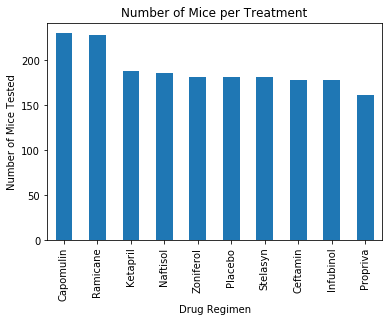

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_tested = mouse_data_complete["Drug Regimen"].value_counts()

plot_pandas = mice_tested.plot.bar(color='tab:blue')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Treatment")
plt.show()


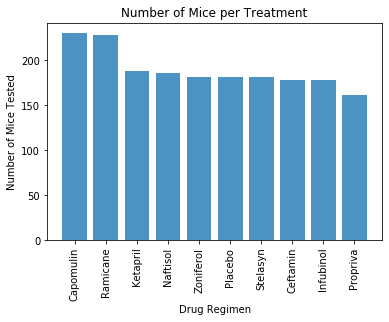

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_tested.index.values 
y_axis = mice_tested.values

plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical") 
plt.title("Number of Mice per Treatment")
plt.show()

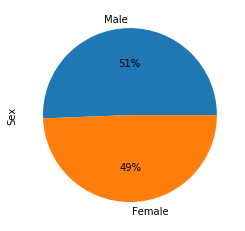

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = mouse_data_complete["Sex"].value_counts()
gender_data.plot.pie(autopct = "%1.0f%%")
plt.show()

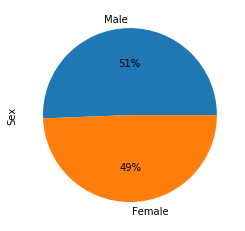

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49, 51]
plot = gender_data.plot.pie(y='Total Count', autopct = "%1.0f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
greatest_time = greatest_time.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df,greatest_time, on = ['Mouse ID', 'Timepoint'], how='right')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Createe empty list to fill with tumor vol data (for plotting)
tumor_vol = []

#Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments: 
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
#add subset
    tumor_vol.append(final_tumor_vol) 
#Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
#IQR Calculation 
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#Find outliers 
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    if len(outliers) != 0:
        print(f"{drug}'s potential outliers: {outliers}") 
    else: 
        print(f"{drug} does not have any potential outliers.") 

Capomulin does not have any potential outliers.
Ramicane does not have any potential outliers.
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin does not have any potential outliers.


Text(0, 0.5, 'Final Tumor Volume (mm3)')

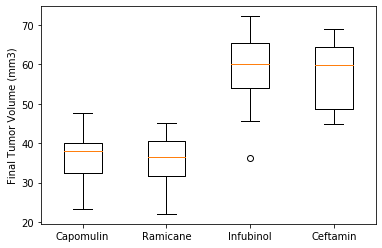

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
plt.boxplot(tumor_vol)
ax1.set_xticklabels(treatments)
plt.ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment on mouse r554')

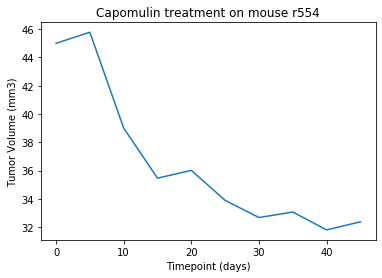

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse = clean_df.loc[clean_df["Mouse ID"].isin(["r554"])] 
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment on mouse r554")

Text(0, 0.5, 'Tumor Volume (mm3)')

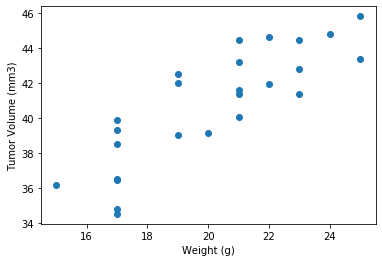

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_filter = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin')]

mouse_means = capomulin_filter.groupby(['Mouse ID']).mean()

plt.scatter(mouse_means['Weight (g)'],mouse_means['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


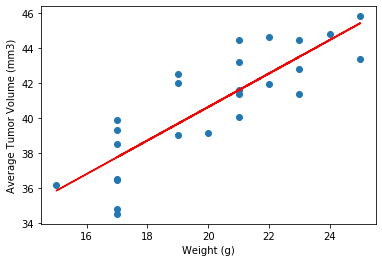

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(mouse_means['Weight (g)'], mouse_means['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}.")

#linear regression values
linear_reg = st.linregress(mouse_means['Weight (g)'], mouse_means['Tumor Volume (mm3)']) 

#y=mx+b for linear regression line, that's the red line!
y_mxb = mouse_means['Weight (g)']*linear_reg[0]+linear_reg[1]

#create a scatter plot
plt.scatter(mouse_means['Weight (g)'], mouse_means['Tumor Volume (mm3)']) 

#plot linear regression line onto the scatter plot
plt.plot(mouse_means['Weight (g)'],y_mxb, color="r") 
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()